# Analiza danych przestrzennych - ćwiczenia laboratoryjne 2022/2023

Ten notatnik zalicza się do grupy zestawów zadań, na podstawie których odbywa się zaliczenie ćwiczeń i podlega zwrotowi do oceny w ustalonym na zajęciach terminie.

Uwagi ogólne:
- Podczas wykonywania zadań należy korzystać wyłącznie z pakietów zaimportowanych na początku notatnika oraz z pakietów wchodzących w skład standardowej biblioteki Pythona, które można zaimportować samodzielnie we wskazanej komórce.
- Swoje rozwiązania należy wprowadzać wyłącznie w miejce następujących fragmentów kodu:<br/> ` # YOUR CODE HERE`<br/> ` raise NotImplementedError()`<br/> Nie należy w żaden sposób modyfikować pozostałych fragmentów kodu oraz elementów notatnika, w szczególności dodawać lub usuwać komórek oraz zmieniać nazwy pliku.
- Jeżeli zestaw zadań wymaga skorzystania z funkcji przygotowanych w ramach wcześniejszych zestawów zadań należy je umieścić we wskazanej komórce.
- Wszystkie wykresy powinny być wykonane w jednolitym, przejrzystym i czytelnym stylu, mieć nadane tytuły, opisane osie oraz odpowiednio dobrany rozmiar, wielkość punktów i grubość linii. Proporcje osi wykresów przedstawiających rozkłady punktów powinny być dobrane tak, aby wykresy odzwierciedlały rzeczywisty rozkład punktów w przestrzeni.
- Zadania, które powodują wyświetlenie komunikatu o błędzie przerywającym wykonywanie kodu nie podlegają ocenie.

Przed odesłaniem zestawu zadań do oceny proszę uzupełnić komórkę z danymi autorów rozwiązania (`NAME` - nazwa grupy, `COLLABORATORS` - imiona, nazwiska i numery indeksów członków grupy) oraz upewnić się, że notatnik działa zgodnie z oczekiwaniami. W tym celu należy skorzystać z opcji **Restart Kernel and Run All Cells...** dostępnej na górnej belce notatnika pod symbolem $\blacktriangleright\blacktriangleright$. 

---

## Zestaw zadań 1: Generowanie procesów punktowych

In [2]:
import numpy as np
import pandas as pd
import scipy as sp
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Miejsce do importu pakietów wchodzących w skład standardowej biblioteki Pythona oraz ustawienie opcji wykorzystywanych pakietów
from math import ceil, floor
sns.set() 
sns.set_theme(style="whitegrid")

### Zadanie 1: Proces regularny z komponentem losowym w obrębie prostokątnego obszaru [10 pkt]

Przygotuj funkcję `regular_on_rectangle()`, która będzie generować proces regularny z komponentem losowym w obrębie prostokątnego obszaru.
Następnie wykorzystaj przygotowaną funkcję do wygenerowania przykładowego rozkładu punktów i przedstaw go w postaci wykresu punktowego.

Algorytm postępowania:
1) Generujemy punkty na regularnej siatce tak, że poszczególne punkty są oddalone od siebie o odległość $d_x$ w poziomie i $d_y$ w pionie, a skrajne punkty są oddalone od krawędzi obszaru odpowiednio o $\frac{1}{2} d_x$ w poziomie i $\frac{1}{2}d_y$ w pionie.
2) Do współrzędnych każdego z punktów dodajemy komponent losowy określony wzorem $r \cdot rand$ , gdzie $r$ to parametr określający wielkość komponentu losowego, a $rand$ to wartość wylosowana z rozkładu jednostajnego na przedziale $[-\frac{1}{2} d_x, \frac{1}{2} d_x]$ w przypadku współrzędnej $x$ i na przedziale $[-\frac{1}{2} d_y, \frac{1}{2} d_y]$ w przypadku współrzędnej $y$.

Parametry przykładowego rozkładu:
 - liczba punktów w poziomie: 20
 - liczba punktów w pionie: 10
 - wartość współczynnika określającego siłę komponentu losowego: 0.5
 - zakres wartości współrzędnej x: 0-20
 - zakres wartości współrzędnej y: 0-10


#### a) Przygotowanie funkcji

In [4]:
def regular_on_rectangle(grid, random_component, x_lim, y_lim):
    """
    Parameters
    -------
    grid: list
        Lista określająca liczbę punktów w poziomie i pionie.
        Przykład: [10, 10]
    random_component: float
        Liczba z przedziału [0, 1] określająca wielkość komponentu losowego.
    x_lim: list
        Lista określająca zakres wartości współrzędnej X.
        Przykład: [0, 10]
    y_lim: list
        Lista określająca zakres wartości współrzędnej Y.
        Przykład: [0, 10]   

    Returns
    -------
    points: DataFrame
        Tablica zawierająca dwie kolumny ze współrzędnymi punktów opisane jako "X" i "Y".
    """
    # 1
    dx = (x_lim[1] - x_lim[0]) / grid[0]
    dy = (y_lim[1] - y_lim[0]) / grid[1]

    x = np.linspace(x_lim[0] + 0.5 * dx, x_lim[1] - 0.5 * dx, grid[0])
    y = np.linspace(y_lim[0] + 0.5 * dy, y_lim[1] - 0.5 * dy, grid[1])

    # 2
    xy = []
    xx, yy = np.meshgrid(x, y, indexing="xy")

    for xxx, yyy in zip(xx, yy):
        for xxxx, yyyy in zip(xxx, yyy):
            xy.append([xxxx + random_component * np.random.uniform(-0.5 * dx, 0.5 * dx),
                       yyyy + random_component * np.random.uniform(-0.5 * dy, 0.5 * dy)])

    return pd.DataFrame(data=xy, columns=["X", "Y"])


#### b) Wygenerowanie procesu

In [5]:
df = regular_on_rectangle([20, 10], 0.5, [0, 20], [0, 10])

#### c) Wizualizacja

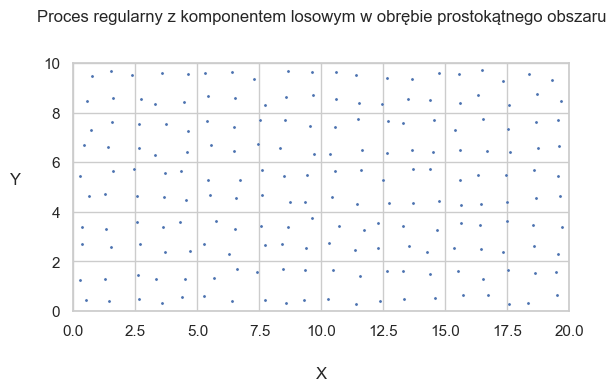

In [6]:
_, axes = plt.subplots()
sns.scatterplot(data=df, x="X", y="Y", s=5)
plt.title("Proces regularny z komponentem losowym w obrębie prostokątnego obszaru", pad=30)
axes.set_xlabel('X', rotation=0, labelpad=20)
axes.set_ylabel('Y', rotation=0, labelpad=20)
axes.set_aspect("equal", "box")
plt.xlim([floor(min(df["X"])), ceil(max(df["X"]))])
plt.ylim([floor(min(df["Y"])), ceil(max(df["Y"]))])
plt.show()

### Zadanie 2: Jednorodny proces punktowy Poissona w obrębie prostokątnego obszaru [10 pkt]

Przygotuj funkcję `homogeneous_poisson_on_rectangle()`, która będzie generować jednorodny proces punktowy Poissona w obrębie prostokątnego obszaru.
Następnie wykorzystaj przygotowaną funkcję do wygenerowania przykładowego rozkładu punktów i przedstaw go w postaci wykresu punktowego.

Algorytm postępowania:
1. Losujemy liczbę punktów $n$ z rozkładu Poissona o wartości oczekiwanej równej $i \cdot a$, gdzie $i$ to intensywność procesu, a $a$ jest powierzchnią obszaru, na którym generujemy punkty.
2. Niezależnie od siebie losujemy wartości współrzędnych $n$ punktów z rozkładów jednostajnych na przedziałach określonych przez przyjęte zakresy wartości współrzędnych $x$ i $y$.

Parametry przykładowego rozkładu:
 - intensywność procesu: 10
 - zakres wartości współrzędnej x: 0-20
 - zakres wartości współrzędnej y: 0-10

#### a) Przygotowanie funkcji

In [7]:
def homogeneous_poisson_on_rectangle(intensity, x_lim, y_lim):
    """
    Parameters
    -------
    intensity: float
        Liczba dodatnia określająca intensywność procesu punktowego.
    x_lim: list
        Lista określająca zakres wartości współrzędnej X.
        Przykład: [0, 10]
    y_lim: list
        Lista określająca zakres wartości współrzędnej Y.
        Przykład: [0, 10]   
    
    Returns
    -------
    points: DataFrame
        Tablica zawierająca dwie kolumny ze współrzędnymi punktów opisane jako "X" i "Y".
    """
    a = (x_lim[1] - x_lim[0]) * (y_lim[1] - y_lim[0])
    n = np.random.poisson(intensity * a, 1)[0]
    df = []
    
    for nn in range(n):
        df.append([np.random.uniform(x_lim[0], x_lim[1]), np.random.uniform(y_lim[0], y_lim[1])])
        
    return pd.DataFrame(data=df, columns=["X", "Y"])


#### b) Wygenerowanie procesu

In [8]:
df = homogeneous_poisson_on_rectangle(10, [0, 20], [0, 10])

#### c) Wizualizacja

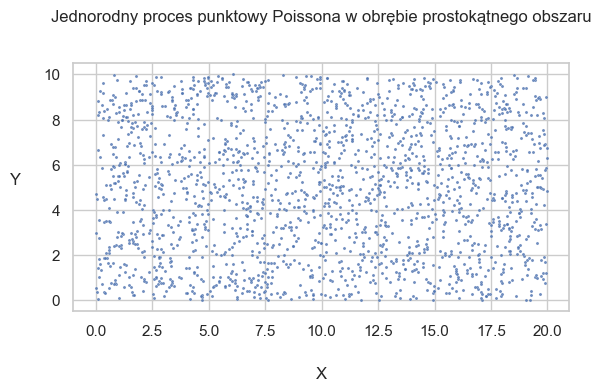

In [9]:
_, axes = plt.subplots()
sns.scatterplot(data=df, x="X", y="Y", alpha=0.8, s=5)
plt.title("Jednorodny proces punktowy Poissona w obrębie prostokątnego obszaru", pad=30)
axes.set_xlabel('X', rotation=0, labelpad=20)
axes.set_ylabel('Y', rotation=0, labelpad=20)
axes.set_aspect("equal", "box")
# plt.xlim([floor(min(df["X"])), ceil(max(df["X"]))])
# plt.ylim([floor(min(df["Y"])), ceil(max(df["Y"]))])
plt.show()

### Zadanie 3: Niejednorodny proces punktowy Poissona w obrębie prostokątnego obszaru [10 pkt]

Przygotuj funkcję `unhomogeneous_poisson_on_rectangle()`, która będzie generować niejednorodny proces punktowy Poissona w obrębie prostokątnego obszaru.
Następnie wykorzystaj przygotowaną funkcję do wygenerowania przykładowego rozkładu punktów i przedstaw go w postaci wykresu punktowego.

Algorytm postępowania:
1. Generujemy punkty z wykorzystaniem jednorodnego procesu Poissona przyjmując intensywność procesu równą maksymalnej wartości jaką osiąga funkcja intensywności w analizowanym obszarze.
2. Przerzedzamy rozkład usuwając z niego punkty z prawdopodobieństwem równym $1-\frac{i}{i_{max}}$, gdzie $i$ to wartość jaką przyjmuje funkcja intensywności dla współrzędnych danego punktu, a $i_{max}$ to maksymalna wartość jaką funkcja intensywności osiąga w granicach analizowanego obszaru.

Parametry przykładowego rozkładu:
 - intensywność procesu: f(x, y) = x
 - zakres wartości współrzędnej x: 0-20
 - zakres wartości współrzędnej y: 0-10

#### a) Przygotowanie funkcji

In [10]:
def unhomogeneous_poisson_on_rectangle(intensity_function, x_lim, y_lim):
    """
    Parameters
    -------
    intensity_function: function
        Funkcja przyjmująca dwa argumenty (macierz 1D współrzędnych X i macierz 1D współrzędnych Y) i zwracająca macierz 1D
        z wartościami funkcji opisującej intensywność procesu dla tych współrzędnych.
    x_lim: list
        Lista określająca zakres wartości współrzędnej X.
        Przykład: [0, 10]
    y_lim: list
        Lista określająca zakres wartości współrzędnej Y.
        Przykład: [0, 10] 
    
    Returns
    -------
    points: DataFrame
        Tablica zawierająca dwie kolumny ze współrzędnymi punktów opisane jako "X" i "Y".
    """
    def reversed_intensity_function(xy):
        return -intensity_function(xy)
    intensity = sp.optimize.minimize(reversed_intensity_function, [0,0], bounds=[x_lim, y_lim]).x[0]
    points = homogeneous_poisson_on_rectangle(intensity, x_lim, y_lim)
    probabilities = [np.random.uniform(0,1)<intensity_function([x, y])/intensity for x,y in zip(points["X"], points["Y"])]
    points = points[probabilities]
    return pd.DataFrame(data=points, columns=["X","Y"])

#### b) Wygenerowanie procesu

In [11]:
df = unhomogeneous_poisson_on_rectangle(lambda xy: xy[0], [0, 20], [0, 10])

#### c) Wizualizacja

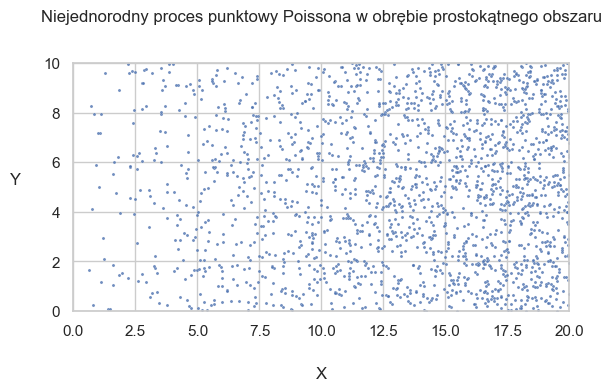

In [12]:
_, axes = plt.subplots()
sns.scatterplot(data=df, x="X", y="Y", alpha=0.8, s=5)
plt.title("Niejednorodny proces punktowy Poissona w obrębie prostokątnego obszaru", pad=30)
axes.set_xlabel('X', rotation=0, labelpad=20)
axes.set_ylabel('Y', rotation=0, labelpad=20)
axes.set_aspect("equal", "box")
plt.xlim([floor(np.nanmin(df["X"])), ceil(np.nanmax(df["X"]))])
plt.ylim([floor(np.nanmin(df["Y"])), ceil(np.nanmax(df["Y"]))])
plt.show()

### Zadanie 4: Proces punktowy Matérna w obrębie prostokątnego obszaru [10 pkt]

Przygotuj funkcję `materna_on_rectangle()`, która będzie generować proces punktowy Materna w obrębie prostokątnego obszaru.
Następnie wykorzystaj przygotowaną funkcję do wygenerowania przykładowego rozkładu punktów i przedstaw go w postaci wykresu punktowego.

Algorytm postępowania:
1. Rozszerzamy analizowany obszar o bufor równy wartości parametru `cluster_radius`.
2. W obrębie rozszerzonego obszaru generujemy punkty w wykorzystaniem jednorodnego procesu Poissona o intensywności równej wartości parametru `parent_intensity`.
3. Wokół każdego z wygenerowanych punktów (okrąg o promieniu równym wartości parametru `cluster_radius`) generujemy punkty z wykorzystaniem jednorodnego procesu Poissona o intensywności równej wartości parametru `daughter_intensity`.
4. Usuwamy z rozkładu wszystkie punkty leżące poza analizowanym (nierozszerzonym) obszarem.

Uwaga! Punkty wygenerowane w ramach procesu macierzystego (centra klastrów) nie są częścią wynikowego rozkładu punktów.

Parametry przykładowego rozkładu:
 - intensywność procesu macierzystego: 0.2
 - intensywność procesu potomnego: 10
 - promień klastra: 1
 - zakres wartości współrzędnej x: 0-20
 - zakres wartości współrzędnej y: 0-10

#### a) Przygotowanie funkcji

In [13]:
def materna_on_rectangle(parent_intensity, daughter_intensity, cluster_radius, x_lim, y_lim):
    """
    Parameters
    -------
    parent_intensity: float
        Liczba dodatnia określająca intensywność macierzystego procesu punktowego.
    daughter_intensity: float
        Liczba dodatnia określająca intensywność potomnego procesu punktowego.
    cluster_radius: float
        Liczba dodatnia określająca promień generowanych klastrów.
    x_lim: list
        Lista określająca zakres wartości współrzędnej X.
        Przykład: [0, 10]
    y_lim: list
        Lista określająca zakres wartości współrzędnej Y.
        Przykład: [0, 10]   
    
    Returns
    -------
    points: DataFrame
        Tablica zawierająca dwie kolumny ze współrzędnymi punktów opisane jako "X" i "Y".
    """
    #1
    x_lim_expanded = [x_lim[0] - cluster_radius, x_lim[1] + cluster_radius]
    y_lim_expanded = [y_lim[0] - cluster_radius, y_lim[1] + cluster_radius]
    #2
    points = homogeneous_poisson_on_rectangle(parent_intensity, x_lim_expanded, y_lim_expanded)
    #3
    new_points = pd.DataFrame()
    
    for x, y in zip(points["X"], points["Y"]):
        new_distribution = homogeneous_poisson_on_rectangle(daughter_intensity, [x-cluster_radius, x+cluster_radius], [y-cluster_radius, y+cluster_radius])
        new_distribution = new_distribution[(new_distribution["X"] - x) ** 2 + (new_distribution["Y"] - y) ** 2 <= cluster_radius]
        new_points = pd.concat([new_points, new_distribution], ignore_index=True)
        
    new_points = new_points[new_points["X"] >= x_lim[0]]    
    new_points = new_points[new_points["X"] <= x_lim[1]]
    new_points = new_points[new_points["Y"] >= y_lim[0]]
    new_points = new_points[new_points["Y"] <= y_lim[1]]
    
    return new_points

#### b) Wygenerowanie procesu

In [14]:
df = materna_on_rectangle(0.2, 10, 1, [0, 20], [0, 10])

#### c) Wizualizacja

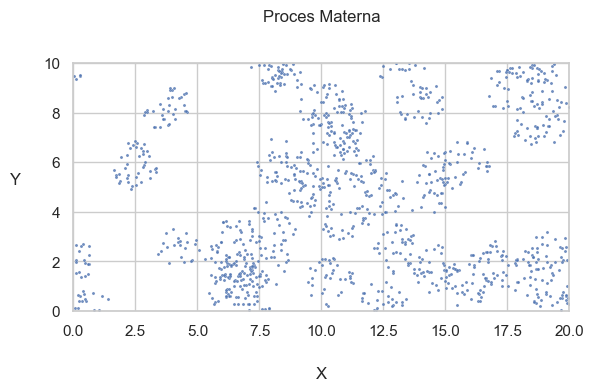

In [15]:
_, axes = plt.subplots()
sns.scatterplot(data=df, x="X", y="Y", alpha=0.8, s=5)
plt.title("Proces Materna", pad=30)
axes.set_xlabel('X', rotation=0, labelpad=20)
axes.set_ylabel('Y', rotation=0, labelpad=20)
axes.set_aspect("equal", "box")
plt.xlim([floor(min(df["X"])), ceil(max(df["X"]))])
plt.ylim([floor(min(df["Y"])), ceil(max(df["Y"]))])
plt.show()

### Zadanie 5: Proces punktowy Thomasa w obrębie prostokątnego obszaru [10 pkt]

Przygotuj funkcję `thomas_on_rectangle()`, która będzie generować proces punktowy Thomasa w obrębie prostokątnego obszaru.
Następnie wykorzystaj przygotowaną funkcję do wygenerowania przykładowego rozkładu punktów i przedstaw go w postaci wykresu punktowego.

Algorytm postępowania:
1. Rozszerzamy analizowany obszar o bufor, którego wielkość jest zależna od wartości parametru `cluster_sigma` (na potrzeby zadania przyjmijmy 4-krotność wartości tego parametru).
2. W obrębie rozszerzonego obszaru generujemy punkty w wykorzystaniem jednorodnego procesu Poissona o intensywności równej wartości parametru `parent_intensity`.
3. Dla każdego z wygenerowanych punktów (centrów klastrów):
    - Losujemy liczbę punktów znajdujących się w obrębie danego klastra $n_c$ z rozkładu Poissona o wartości oczekiwanej równej wartości parametru `mean_cluster_size`.
    - Niezależnie od siebie losujemy wartości współrzędnych $n_c$ punktów z rozkładów normalnych o wartości oczekiwanej równej współrzędnej punktu stanowiącego centrum klastra i odchyleniu standardowym równym wartości parametru `cluster_sigma`.
4. Usuwamy z rozkładu wszystkie punkty leżące poza analizowanym (nierozszerzonym) obszarem.

Uwaga! Punkty wygenerowane w ramach procesu macierzystego (centra klastrów) nie są częścią wynikowego rozkładu punktów.

Parametry przykładowego rozkładu:
 - intensywność procesu macierzystego: 0.2
 - średnia liczebność klastra: 30
 - odchylenie standardowe klastra: 0.5
 - zakres wartości współrzędnej x: 0-20
 - zakres wartości współrzędnej y: 0-10

#### a) Przygotowanie funkcji

In [16]:
def thomas_on_rectangle(parent_intensity, mean_cluster_size, cluster_sigma, x_lim, y_lim):
    """
    Parameters
    -------
    parent_intensity: float
        Liczba dodatnia określająca intensywność macierzystego procesu punktowego.
    mean_cluster_size: float
        Liczba dodatnia określająca oczekiwaną liczebność generowanych klastrów.
    cluster_sigma: float
        Liczba dodatnia określająca odchylenie standardowe rozkładu wykorzystywanego w procesie generowania klastrów.
    x_lim: list
        Lista określająca zakres wartości współrzędnej X.
        Przykład: [0, 10]
    y_lim: list
        Lista określająca zakres wartości współrzędnej Y.
        Przykład: [0, 10]   
    
    Returns
    -------
    points: DataFrame
        Tablica zawierająca dwie kolumny ze współrzędnymi punktów opisane jako "X" i "Y".
    """
    # 1
    BUFFER_INTENSITY = 4
    x_lim_expanded = [x_lim[0] - BUFFER_INTENSITY * cluster_sigma, x_lim[1] + BUFFER_INTENSITY * cluster_sigma]
    y_lim_expanded = [y_lim[0] - BUFFER_INTENSITY * cluster_sigma, y_lim[1] + BUFFER_INTENSITY * cluster_sigma]
    # 2
    points = homogeneous_poisson_on_rectangle(parent_intensity, x_lim_expanded, y_lim_expanded)
    # 3
    n = []
    
    for x, y in zip(points["X"], points["Y"]):
        n_c = np.random.poisson(lam=mean_cluster_size)
        for _ in range(n_c):
            n.append(
                [np.random.normal(loc=x, scale=cluster_sigma), 
                 np.random.normal(loc=y, scale=cluster_sigma)
                ]
            )
    
    n = pd.DataFrame(n, columns=["X", "Y"])
    n = n[n["X"] >= x_lim[0]]
    n = n[n["X"] <= x_lim[1]]
    n = n[n["Y"] >= y_lim[0]]
    n = n[n["Y"] <= y_lim[1]]
    return n

#### b) Wygenerowanie procesu

In [17]:
df = thomas_on_rectangle(0.2, 30, 0.5, [0, 20], [0, 10])

#### c) Wizualizacja

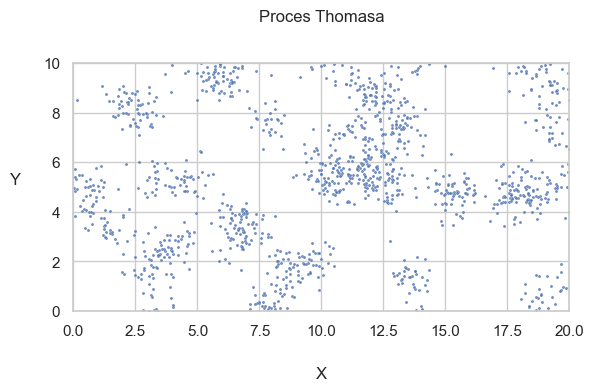

In [18]:
_, axes = plt.subplots()
sns.scatterplot(data=df, x="X", y="Y", alpha=0.8, s=5)
plt.title("Proces Thomasa", pad=30)
axes.set_xlabel('X', rotation=0, labelpad=20)
axes.set_ylabel('Y', rotation=0, labelpad=20)
axes.set_aspect("equal", "box")
plt.xlim([floor(min(df["X"])), ceil(max(df["X"]))])
plt.ylim([floor(min(df["Y"])), ceil(max(df["Y"]))])
plt.show()